In [12]:
# 安装依赖库
!pip3 install numpy seaborn matplotlib sklearn pandas

# 鸢尾花实战

In [4]:
# 下载数据集
!wget -P dataset https://wii-share.oss-cn-beijing.aliyuncs.com/dataset/Iris.csv 

--2022-06-05 07:26:16--  https://wii-share.oss-cn-beijing.aliyuncs.com/dataset/Iris.csv
Resolving wii-share.oss-cn-beijing.aliyuncs.com (wii-share.oss-cn-beijing.aliyuncs.com)... 59.110.190.41
Connecting to wii-share.oss-cn-beijing.aliyuncs.com (wii-share.oss-cn-beijing.aliyuncs.com)|59.110.190.41|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5107 (5.0K) [text/csv]
Saving to: ‘dataset/Iris.csv’

Iris.csv            100%[===================>]   4.99K  --.-KB/s    in 0s      

2022-06-05 07:26:31 (25.7 MB/s) - ‘dataset/Iris.csv’ saved [5107/5107]



In [13]:
# 导入基础库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [108]:
# 读取数据集
df = pd.read_csv('dataset/Iris.csv')
df = df.drop('Id', axis=1)

In [109]:
# 展示数据集信息
print(df.info())
print(df.head())
print(df['Species'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [110]:
def trans(row):
    if row['Species'] == 'Iris-setosa':
        return np.int32(1)
    return np.int32(0)

df['Label'] = pd.Series(data=df.apply(trans, axis=1), dtype='int')
print(df['Label'].unique())

[1 0]


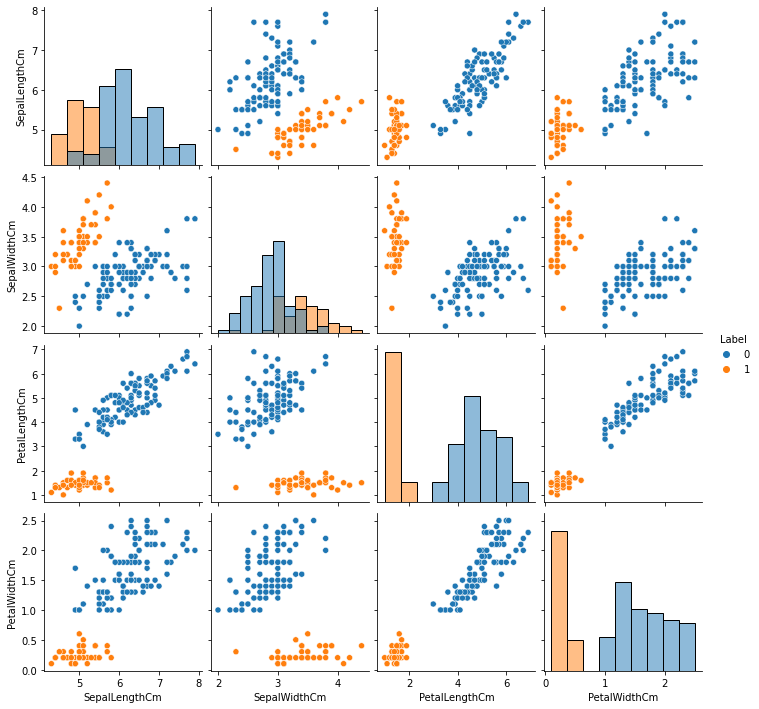

In [111]:
# 可视化描述
sns.pairplot(data=df, diag_kind='hist', hue='Label')

In [52]:
columns = ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Label']
features = df[columns].to_numpy()
np.random.shuffle(dfn)

[[147.    6.3   2.5   5.    1.9   0. ]
 [ 85.    5.4   3.    4.5   1.5   0. ]
 [  6.    5.4   3.9   1.7   0.4   1. ]
 [ 76.    6.6   3.    4.4   1.4   0. ]
 [124.    6.3   2.7   4.9   1.8   0. ]]


In [63]:
print(dfn[:5])
print(dfn[:3, 0])

[[147.    6.3   2.5   5.    1.9   0. ]
 [ 85.    5.4   3.    4.5   1.5   0. ]
 [  6.    5.4   3.9   1.7   0.4   1. ]
 [ 76.    6.6   3.    4.4   1.4   0. ]
 [124.    6.3   2.7   4.9   1.8   0. ]]
[147.  85.   6.]


In [112]:
# 区分 feature & label
features = dfn[:, 0:5]
labels = dfn[:, 5]

# 区分训练集和测试集
from sklearn.model_selection import train_test_split
train_feature, test_feature, train_label, test_label = train_test_split(features, labels, test_size=0.33)

# mid = int(len(dfn) * 2 / 3)
# train_feature = features[:mid]
# train_label = labels[:mid]
# test_feature = features[mid:]
# test_label = labels[mid:]

In [113]:
print(features[:3])
print(label[:3])
print(train_feature[:3])
print(train_label[:3])
print(test_feature[:3])
print(test_label[:3])

[[147.    6.3   2.5   5.    1.9]
 [ 85.    5.4   3.    4.5   1.5]
 [  6.    5.4   3.9   1.7   0.4]]
[0. 0. 1.]
[[67.   5.6  3.   4.5  1.5]
 [65.   5.6  2.9  3.6  1.3]
 [70.   5.6  2.5  3.9  1.1]]
[0. 0. 0.]
[[ 41.    5.    3.5   1.3   0.3]
 [ 53.    6.9   3.1   4.9   1.5]
 [140.    6.9   3.1   5.4   2.1]]
[1. 0. 0.]


In [114]:
# 模型训练
lr_clf = LogisticRegression()
lr_clf.fit(train_feature, train_label)

LogisticRegression()

In [115]:
# 查看模型权重
print(lr_clf.coef_)

# 查看 w0
print(lr_clf.intercept_)

print(columns)

[[-0.69808344 -0.33699104  0.09500869 -0.71508613 -0.28125066]]
[39.30292573]
['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Label']


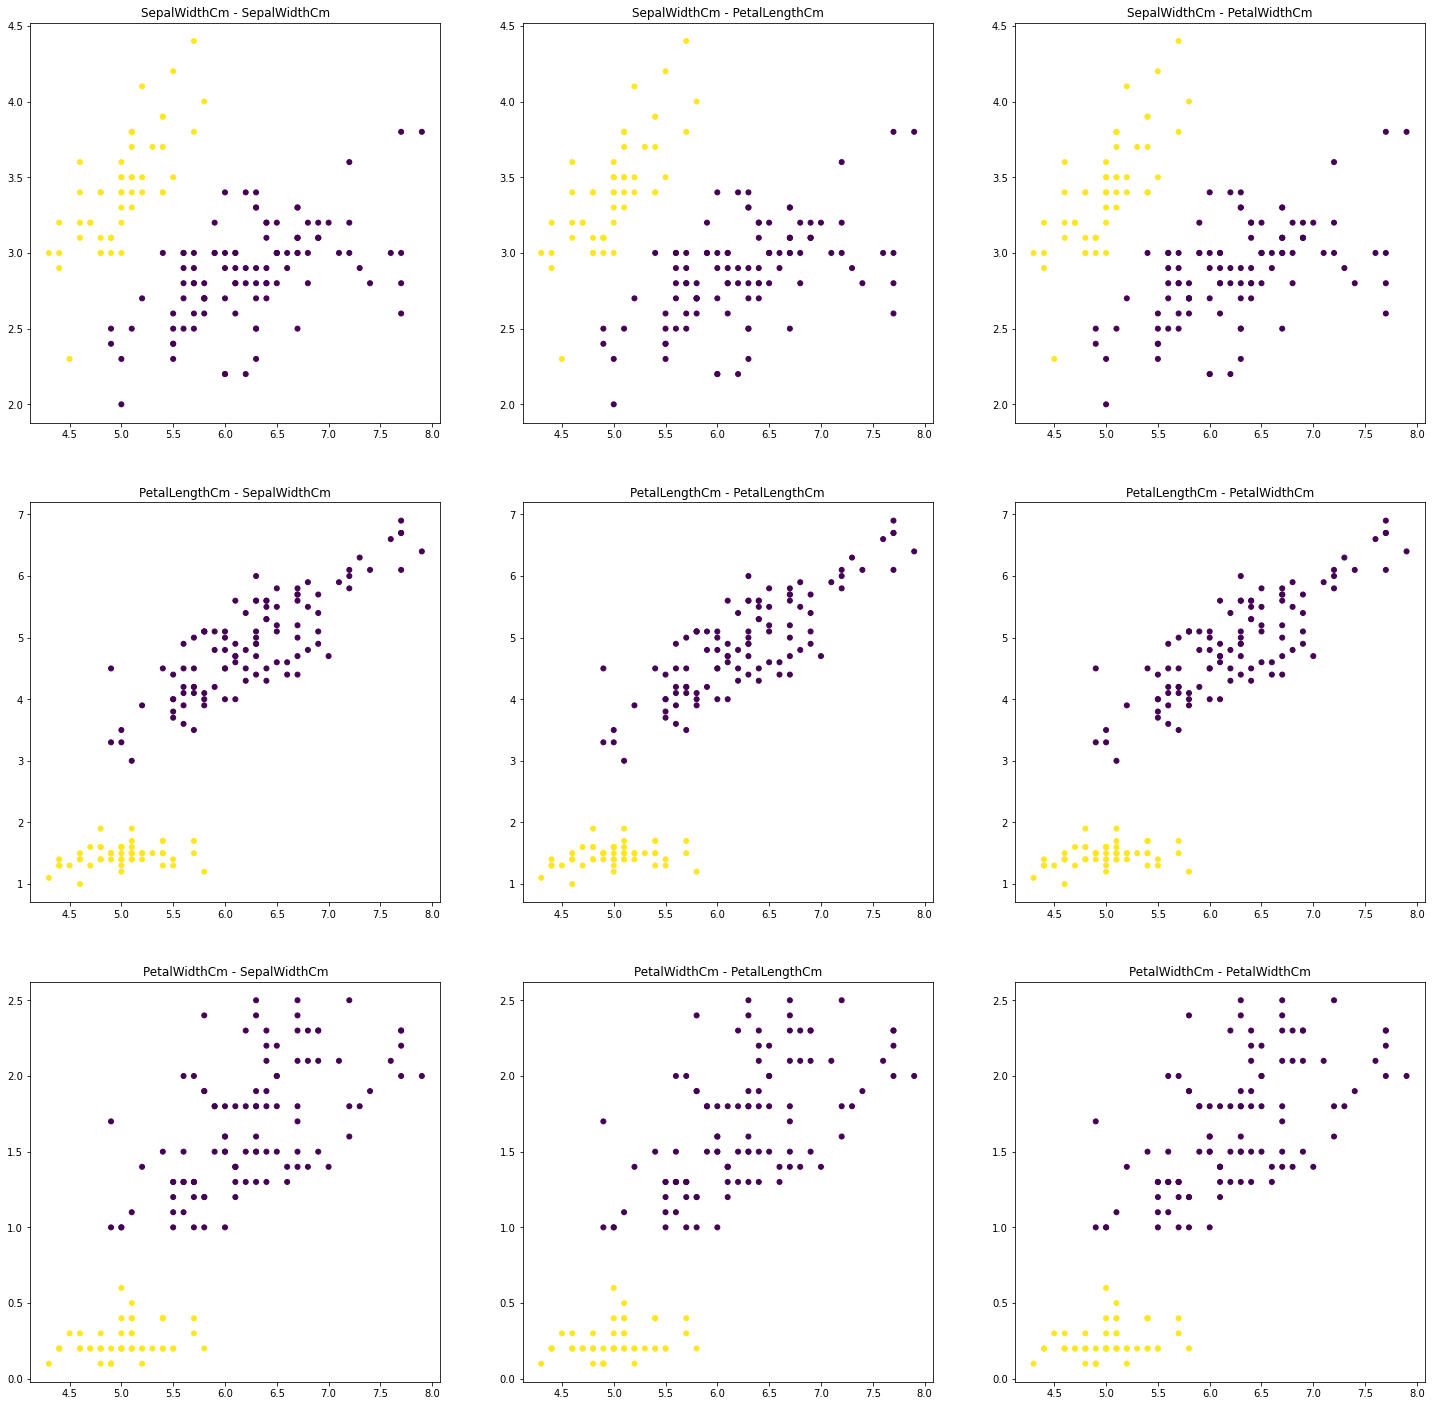

In [116]:
# 可视化采样点, 展示 SepalLengthCm 和 SepalWidthCm、PetalLengthCm、PetalWidthCm
start = 2
end = 5
fg, axs = plt.subplots(end - start, end - start, figsize=(25, 25))
for i in range(start, end):
    for j in range(start, end):
        ii, ij = i - start, j - start
        axs[ii, ij].scatter(features[:, 1], features[:, i], c=labels, s=25, cmap='viridis')
        axs[ii, ij].set_title(columns[i] + ' - ' + columns[j])

In [117]:
# 预测概率 ()
proba = lr_clf.predict_proba(test_feature)
print(proba[:3])
# 预测结果
predict = lr_clf.predict(test_feature)
print(predict)

[[2.44734297e-04 9.99755266e-01]
 [9.74716778e-01 2.52832219e-02]
 [1.00000000e+00 6.44567197e-29]]
[1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1.
 0. 0.]


In [119]:
# 打印准确率
from sklearn import metrics
print(metrics.accuracy_score(predict, test_label))

1.0


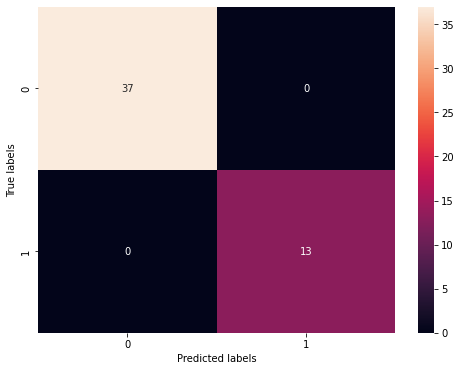

In [121]:
# 打印混淆矩阵
confusion_matrix_result = metrics.confusion_matrix(predict, test_label)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()